In [18]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from CHAID import Tree
from optbinning import OptimalBinning
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

(CVXPY) May 21 12:49:44 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 21 12:49:44 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [96]:
def convert_to_csv(frame, count=1, name="file", description='Log Transformed variables'):
    filename = f"{name}_{count}.csv"
    frame = frame.to_csv(filename, index=False)
    textfile = description.write(description)
    return frame, textfile

In [81]:
df = pd.read_csv('online_shoppers_intention (1).csv')

In [3]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False


In [12]:
df['Weekend'] = df['Weekend'].astype('object')

In [13]:
vars_to_transform = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates in %', 'ExitRates in %', 'PageValues']]
vars_to_clip_discrete = df[['Browser', 'Region', 'TrafficType']]
vars_to_clip_cont = vars_to_transform
vars_to_deal_with_rem = df['SpecialDay (probability)']
cat_vars = [col for col in df.columns if df[col].dtypes == 'object']
num_vars = [col for col in df.columns if df[col].dtypes in ['int64', 'float64']]

In [14]:
cat_vars

['Month', 'VisitorType', 'Weekend']

In [15]:
num_vars

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates in %',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

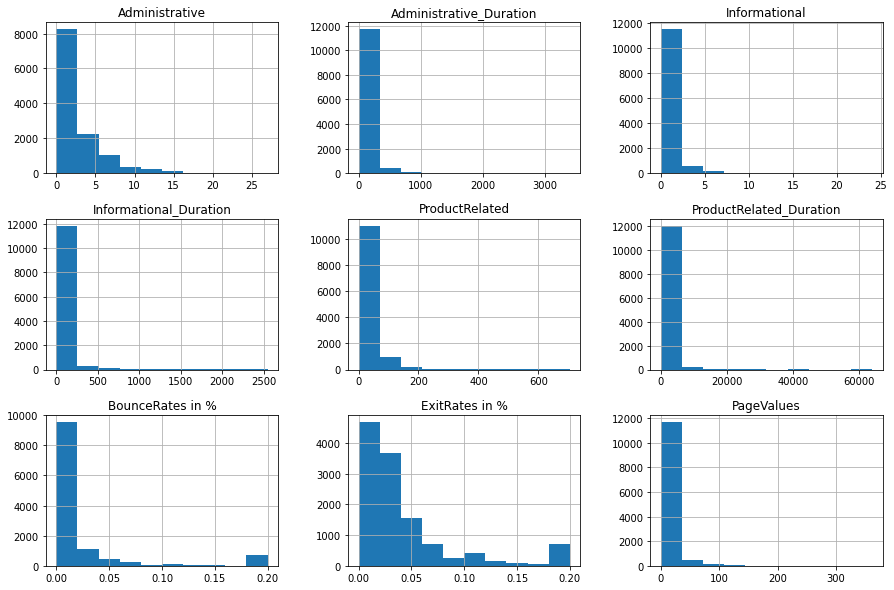

In [22]:
vars_to_transform.hist(figsize=(15, 10))
plt.show()

In [24]:
for col in vars_to_transform:
    df.loc[:, f"winsorize_{col}_limit(0.0, 0.05)"] = winsorize(df[col], limits=(0.0, 0.05))
    df.loc[:, f"winsorize_{col}_limit(0.0, 0.01)"] = winsorize(df[col], limits=(0.0, 0.01))

In [41]:
pd.set_option('display.max_columns', 50)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,"winsorize_Administrative_limit(0.0, 0.05)","winsorize_Administrative_Duration_limit(0.0, 0.05)","winsorize_Informational_limit(0.0, 0.05)","winsorize_Informational_Duration_limit(0.0, 0.05)","winsorize_ProductRelated_limit(0.0, 0.05)","winsorize_ProductRelated_Duration_limit(0.0, 0.05)","winsorize_BounceRates in %_limit(0.0, 0.05)","winsorize_ExitRates in %_limit(0.0, 0.05)","winsorize_PageValues_limit(0.0, 0.05)","winsorize_Administrative_limit(0.0, 0.01)","winsorize_Administrative_Duration_limit(0.0, 0.01)","winsorize_Informational_limit(0.0, 0.01)","winsorize_Informational_Duration_limit(0.0, 0.01)","winsorize_ProductRelated_limit(0.0, 0.01)","winsorize_ProductRelated_Duration_limit(0.0, 0.01)","winsorize_BounceRates in %_limit(0.0, 0.01)","winsorize_ExitRates in %_limit(0.0, 0.01)","winsorize_PageValues_limit(0.0, 0.01)"
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0


array([[<AxesSubplot:title={'center':'winsorize_Administrative_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_Administrative_Duration_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_Informational_limit(0.0, 0.05)'}>],
       [<AxesSubplot:title={'center':'winsorize_Informational_Duration_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_ProductRelated_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_ProductRelated_Duration_limit(0.0, 0.05)'}>],
       [<AxesSubplot:title={'center':'winsorize_BounceRates in %_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_ExitRates in %_limit(0.0, 0.05)'}>,
        <AxesSubplot:title={'center':'winsorize_PageValues_limit(0.0, 0.05)'}>]],
      dtype=object)

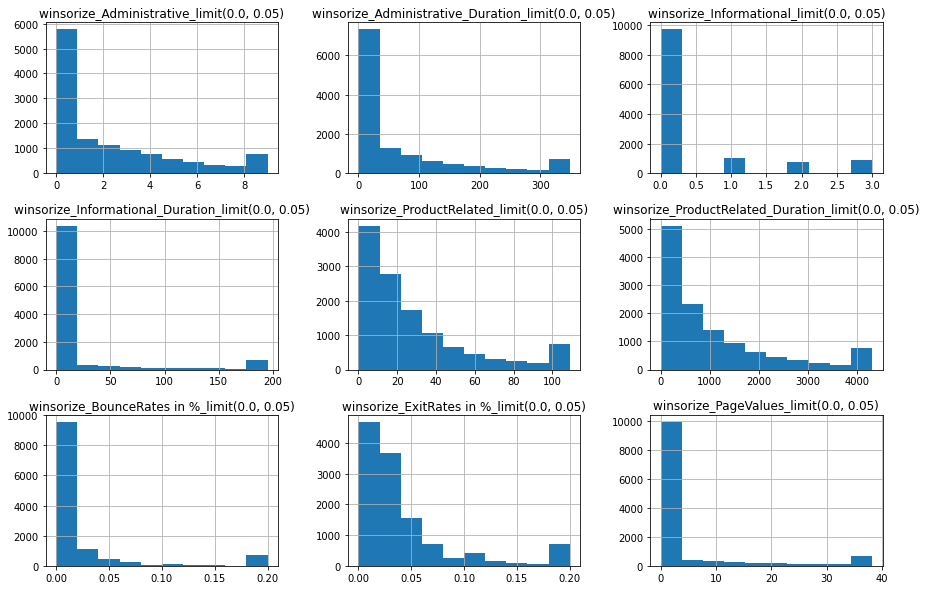

In [43]:
df[['winsorize_Administrative_limit(0.0, 0.05)', 'winsorize_Administrative_Duration_limit(0.0, 0.05)', 'winsorize_Informational_limit(0.0, 0.05)', 'winsorize_Informational_Duration_limit(0.0, 0.05)', 'winsorize_ProductRelated_limit(0.0, 0.05)', 'winsorize_ProductRelated_Duration_limit(0.0, 0.05)', 'winsorize_BounceRates in %_limit(0.0, 0.05)', 'winsorize_ExitRates in %_limit(0.0, 0.05)', 'winsorize_PageValues_limit(0.0, 0.05)']].hist(figsize=(15, 10))

array([[<AxesSubplot:title={'center':'winsorize_Administrative_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_Administrative_Duration_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_Informational_limit(0.0, 0.01)'}>],
       [<AxesSubplot:title={'center':'winsorize_Informational_Duration_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_ProductRelated_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_ProductRelated_Duration_limit(0.0, 0.01)'}>],
       [<AxesSubplot:title={'center':'winsorize_BounceRates in %_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_ExitRates in %_limit(0.0, 0.01)'}>,
        <AxesSubplot:title={'center':'winsorize_PageValues_limit(0.0, 0.01)'}>]],
      dtype=object)

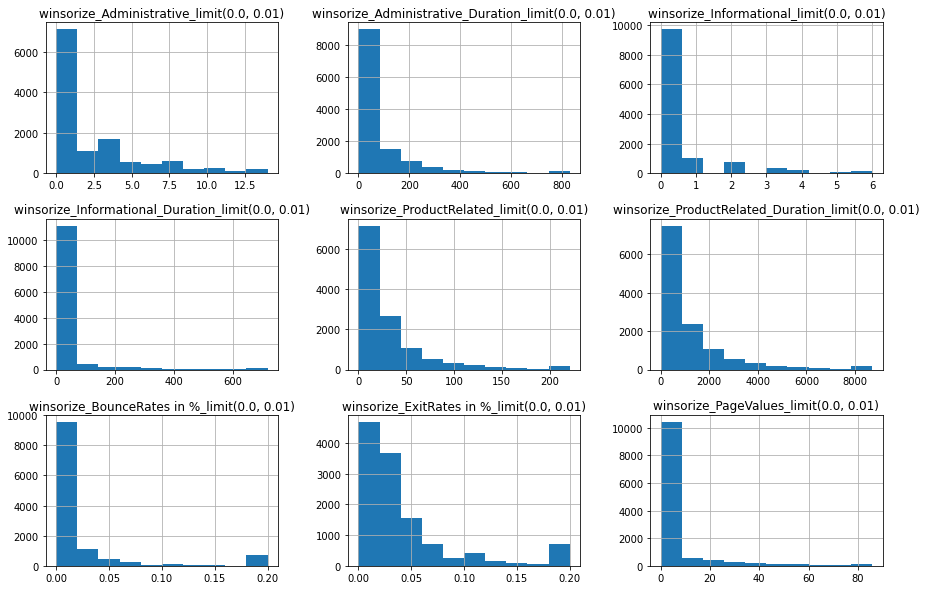

In [44]:
df[['winsorize_Administrative_limit(0.0, 0.01)', 'winsorize_Administrative_Duration_limit(0.0, 0.01)', 'winsorize_Informational_limit(0.0, 0.01)', 'winsorize_Informational_Duration_limit(0.0, 0.01)', 'winsorize_ProductRelated_limit(0.0, 0.01)', 'winsorize_ProductRelated_Duration_limit(0.0, 0.01)', 'winsorize_BounceRates in %_limit(0.0, 0.01)', 'winsorize_ExitRates in %_limit(0.0, 0.01)', 'winsorize_PageValues_limit(0.0, 0.01)']].hist(figsize=(15, 10))

In [48]:
from optbinning import OptimalBinning
for col in vars_to_transform:
    ob = OptimalBinning(name=col, dtype="numerical")
    ob.fit(df[col], df['Revenue'])
    df.loc[:, f"{col}_bins"] = ob.transform(df[col])

In [49]:
df.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,"winsorize_Administrative_limit(0.0, 0.05)","winsorize_Administrative_Duration_limit(0.0, 0.05)","winsorize_Informational_limit(0.0, 0.05)","winsorize_Informational_Duration_limit(0.0, 0.05)","winsorize_ProductRelated_limit(0.0, 0.05)","winsorize_ProductRelated_Duration_limit(0.0, 0.05)","winsorize_BounceRates in %_limit(0.0, 0.05)","winsorize_ExitRates in %_limit(0.0, 0.05)","winsorize_PageValues_limit(0.0, 0.05)","winsorize_Administrative_limit(0.0, 0.01)","winsorize_Administrative_Duration_limit(0.0, 0.01)","winsorize_Informational_limit(0.0, 0.01)","winsorize_Informational_Duration_limit(0.0, 0.01)","winsorize_ProductRelated_limit(0.0, 0.01)","winsorize_ProductRelated_Duration_limit(0.0, 0.01)","winsorize_BounceRates in %_limit(0.0, 0.01)","winsorize_ExitRates in %_limit(0.0, 0.01)","winsorize_PageValues_limit(0.0, 0.01)",Administrative_bins,Administrative_Duration_bins,Informational_bins,Informational_Duration_bins,ProductRelated_bins,ProductRelated_Duration_bins,BounceRates in %_bins,ExitRates in %_bins,PageValues_bins
0,0.626658,0.556298,0.172334,0.143577,1.820727,2.373134,3.076205,4.05153,1.481485,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.626658,0.556298,0.172334,0.143577,1.820727,2.373134,3.076205,4.05153,1.481485


In [75]:
bin_cols = []
for col in df.columns:
    if col in vars_to_transform:
        name = f"{col}_bins"
        bin_cols.append(name)

array([[<AxesSubplot:title={'center':'Administrative_bins'}>,
        <AxesSubplot:title={'center':'Administrative_Duration_bins'}>,
        <AxesSubplot:title={'center':'Informational_bins'}>],
       [<AxesSubplot:title={'center':'Informational_Duration_bins'}>,
        <AxesSubplot:title={'center':'ProductRelated_bins'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration_bins'}>],
       [<AxesSubplot:title={'center':'BounceRates in %_bins'}>,
        <AxesSubplot:title={'center':'ExitRates in %_bins'}>,
        <AxesSubplot:title={'center':'PageValues_bins'}>]], dtype=object)

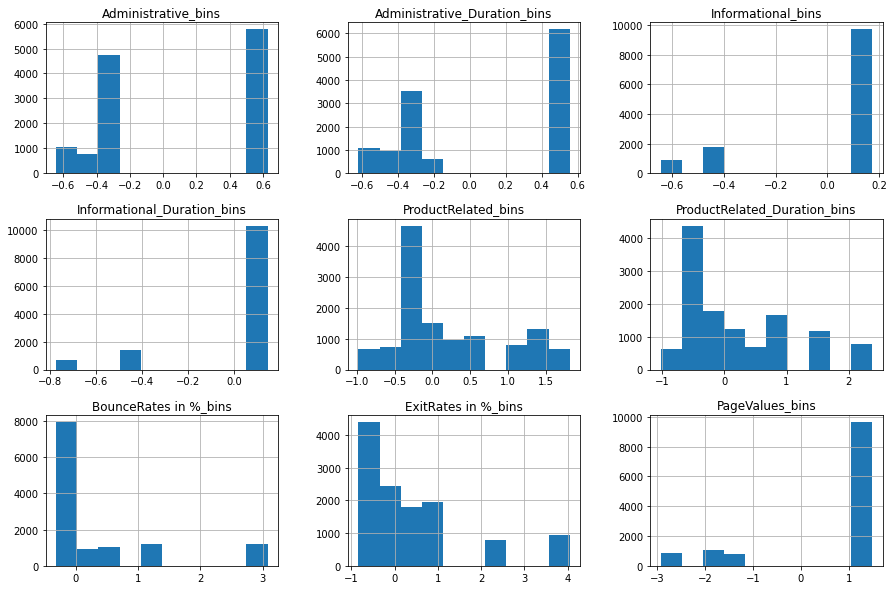

In [77]:
df[bin_cols].hist(figsize=(15, 10))

In [82]:
for col in vars_to_transform:
    df.loc[:, f"{col}_log"] = np.log1p(df[col])

In [83]:
log_cols = []
for col in df.columns:
    if col in vars_to_transform:
        name = f"{col}_log"
        log_cols.append(name)

array([[<AxesSubplot:title={'center':'Administrative_log'}>,
        <AxesSubplot:title={'center':'Administrative_Duration_log'}>,
        <AxesSubplot:title={'center':'Informational_log'}>],
       [<AxesSubplot:title={'center':'Informational_Duration_log'}>,
        <AxesSubplot:title={'center':'ProductRelated_log'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration_log'}>],
       [<AxesSubplot:title={'center':'BounceRates in %_log'}>,
        <AxesSubplot:title={'center':'ExitRates in %_log'}>,
        <AxesSubplot:title={'center':'PageValues_log'}>]], dtype=object)

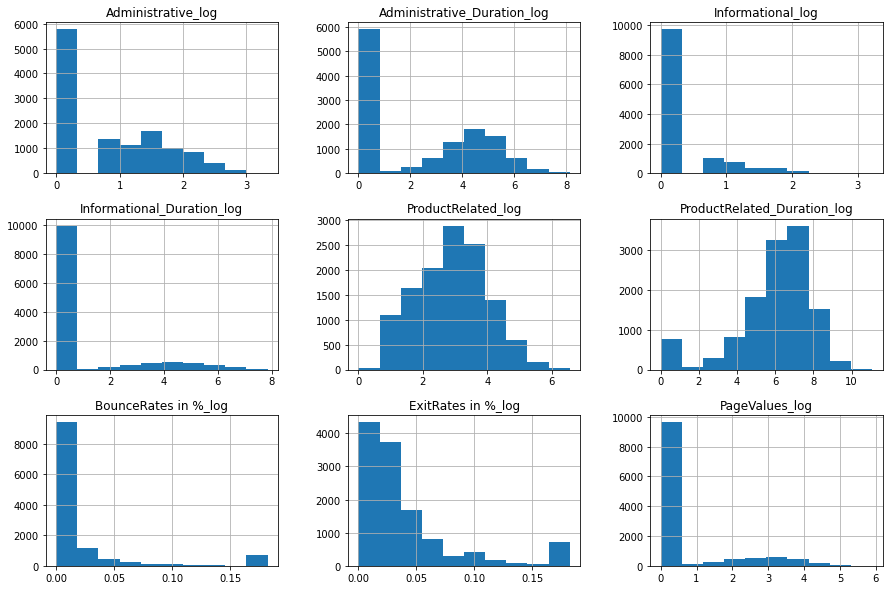

In [84]:
df[log_cols].hist(figsize=(15, 10))

In [85]:
for col in vars_to_transform:
    df.loc[:, f"{col}_sqrt"] = np.sqrt(df[col])

In [86]:
sqrt_cols = []
for col in df.columns:
    if col in vars_to_transform:
        name = f"{col}_log"
        sqrt_cols.append(name)

array([[<AxesSubplot:title={'center':'Administrative_log'}>,
        <AxesSubplot:title={'center':'Administrative_Duration_log'}>,
        <AxesSubplot:title={'center':'Informational_log'}>],
       [<AxesSubplot:title={'center':'Informational_Duration_log'}>,
        <AxesSubplot:title={'center':'ProductRelated_log'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration_log'}>],
       [<AxesSubplot:title={'center':'BounceRates in %_log'}>,
        <AxesSubplot:title={'center':'ExitRates in %_log'}>,
        <AxesSubplot:title={'center':'PageValues_log'}>]], dtype=object)

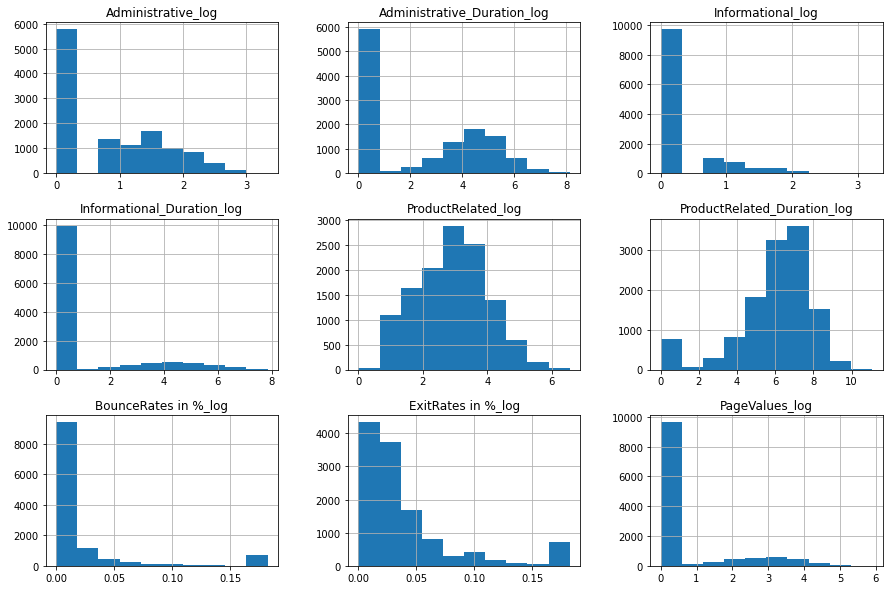

In [87]:
df[sqrt_cols].hist(figsize=(15, 10))

(array([5903.,   16.,  143.,  221.,  595., 1197., 1959., 1679.,  538.,
          79.]),
 array([0.        , 0.54660318, 1.09320637, 1.63980955, 2.18641274,
        2.73301592, 3.2796191 , 3.82622229, 4.37282547, 4.91942866,
        5.46603184]),
 <BarContainer object of 10 artists>)

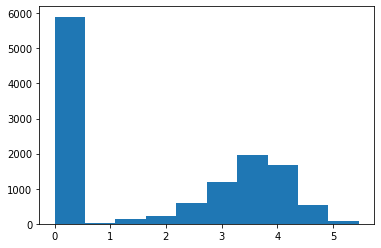

In [99]:
plt.hist(stats.yeojohnson(df['Administrative_Duration'])[0])

(array([7.271e+03, 2.822e+03, 1.468e+03, 4.790e+02, 1.700e+02, 6.300e+01,
        3.900e+01, 1.300e+01, 4.000e+00, 1.000e+00]),
 array([ 0.        ,  5.82987993, 11.65975986, 17.48963979, 23.31951972,
        29.14939965, 34.97927958, 40.80915951, 46.63903944, 52.46891937,
        58.2987993 ]),
 <BarContainer object of 10 artists>)

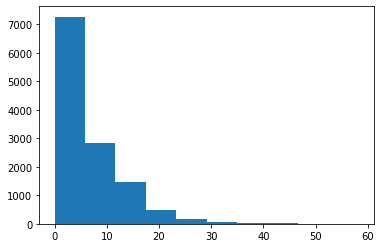

In [101]:
plt.hist(np.sqrt(df['Administrative_Duration']))

In [104]:
from outliers import smirnov_grubbs as grubbs

grubbs.test(df['Administrative_Duration'], alpha=.05)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
12325    145.0
12326      0.0
12327      0.0
12328     75.0
12329      0.0
Name: Administrative_Duration, Length: 12328, dtype: float64